In [1]:
import pandas as pd
import numpy as np
import functools as ft

In [81]:
import scipy

# Task 1

In [21]:
## Clear Night
clear_night_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_ctl.csv")
clear_night_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_cvip.csv")
clear_night_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0912_170355-data_fi_ghost_cutin-single_traj.csv")

## Clear Sunset
clear_sunset_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_ctl.csv")
clear_sunset_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_cvip.csv")
clear_sunset_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0912_170007-data_fi_ghost_cutin-single_traj.csv")

## Clear Noon
clear_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_ctl.csv")
clear_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_cvip.csv")
clear_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165658-data_fi_ghost_cutin-single_traj.csv")

## Rain Noon
rain_noon_ctl = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_ctl.csv")
rain_noon_cvip = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_cvip.csv")
rain_noon_traj = pd.read_csv("campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0912_165918-data_fi_ghost_cutin-single_traj.csv")

In [3]:
## First 5 rows of clear-night condition

print(clear_night_ctl.head(5),'\n')
print(clear_night_cvip.head(5),'\n')
print(clear_night_traj.head(5))

      ts  agent_id  throttle     steer  brake
0  34097         0       0.9 -0.013192    0.0
1  34098         0       0.9 -0.003670    0.0
2  34099         0       0.9 -0.004190    0.0
3  34100         0       0.9 -0.003286    0.0
4  34101         0       0.9  0.000093    0.0 

      ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  34097         0  500.491189  198.767441 -95.832657 -499.819366
1  34098         0    5.595580  195.567444 -90.832657    0.100000
2  34099         0    5.592365  195.567444 -90.832657    0.095407
3  34100         0    5.589578  195.567444 -90.832657    0.084691
4  34101         0    5.587154  195.567444 -90.832657    0.069311 

      ts  agent_id           x         y         z    v
0  34097         0  192.362411 -86.26268  0.539326  0.0
1  34098         0  192.362411 -86.26268  0.491906  0.0
2  34099         0  192.362411 -86.26268  0.438374  0.0
3  34100         0  192.362411 -86.26268  0.378732  0.0
4  34101         0  192.362411 -86.26268  0.

In [48]:
## Clear Night Summarization

clear_night_dfs = [clear_night_ctl,clear_night_cvip,clear_night_traj]
clear_night = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), clear_night_dfs)
clear_night = clear_night.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_night = clear_night[1:].reset_index().drop(['index'],axis=1)
clear_night.head()

,ts,agent_id,throttle,steer,brake,cvip,x,y,v
0,34098,0,0.9,-0.003670,0.0,5.595580,192.362411,-86.26268,0.0
1,34099,0,0.9,-0.004190,0.0,5.592365,192.362411,-86.26268,0.0
2,34100,0,0.9,-0.003286,0.0,5.589578,192.362411,-86.26268,0.0
3,34101,0,0.9,0.000093,0.0,5.587154,192.362411,-86.26268,0.0
4,34102,0,0.9,0.003365,0.0,5.584903,192.362411,-86.26268,0.0


In [49]:
## Duration

clear_night_duration = clear_night['ts'][clear_night.shape[0]-1] - clear_night['ts'][0]
print(clear_night['ts'][0],clear_night['ts'][clear_night.shape[0]-1])
print(clear_night_duration," milliseonds")

34098 34936
838  milliseonds


In [6]:
## Mean and Standard Dev

print(clear_night.drop(['ts','agent_id'],axis=1).mean(axis=0),'\n')
print(clear_night.drop(['ts','agent_id'],axis=1).std(axis=0))

throttle      0.633596
steer         0.003531
brake         0.115476
cvip         32.742418
x           191.314683
y           -32.234818
v             6.216075
dtype: float64 

throttle     0.345303
steer        0.048470
brake        0.319786
cvip        32.175866
x            1.171030
y           39.092016
v            2.883256
dtype: float64


In [50]:
## Clear Sunset Compilation, Duration

clear_sunset_dfs = [clear_sunset_ctl,clear_sunset_cvip,clear_sunset_traj]
clear_sunset = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), clear_sunset_dfs)
clear_sunset = clear_sunset.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_sunset = clear_sunset[1:].reset_index().drop(['index'],axis=1)

clear_sunset_duration = clear_sunset['ts'][clear_sunset.shape[0]-1] - clear_sunset['ts'][0]
print(clear_sunset['ts'][0],clear_sunset['ts'][clear_sunset.shape[0]-1])
print(clear_sunset_duration," milliseonds")

27579 28335
756  milliseonds


In [51]:
## Clear Noon Compilation, Duration

clear_noon_dfs = [clear_noon_ctl,clear_noon_cvip,clear_noon_traj]
clear_noon = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), clear_noon_dfs)
clear_noon = clear_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
clear_noon = clear_noon[1:].reset_index().drop(['index'],axis=1)

clear_noon_duration = clear_noon['ts'][clear_noon.shape[0]-1] - clear_noon['ts'][0]
print(clear_noon['ts'][0],clear_noon['ts'][clear_noon.shape[0]-1])
print(clear_noon_duration," milliseonds")

16798 17548
750  milliseonds


In [52]:
## Rainy Noon Compilation, Duration

rain_noon_dfs = [rain_noon_ctl,rain_noon_cvip,rain_noon_traj]
rain_noon = ft.reduce(lambda left, right: pd.merge(left, right, on=['ts','agent_id']), rain_noon_dfs)
rain_noon = rain_noon.drop(['cvip_x','cvip_y','cvip_z','z'],axis=1)
rain_noon = rain_noon[1:].reset_index().drop(['index'],axis=1)

rain_noon_duration = rain_noon['ts'][rain_noon.shape[0]-1] - rain_noon['ts'][0]
print(rain_noon['ts'][0],rain_noon['ts'][rain_noon.shape[0]-1])
print(rain_noon_duration," milliseonds")

25804 26204
400  milliseonds


In [53]:
## Mean and STD Calculations -- Combined

means_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).mean(axis=0).round(3),
}
means = pd.DataFrame(means_dict)

std_dict = {
    "Clear Night":clear_night.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Sunset":clear_sunset.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Clear Noon":clear_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
    "Rain Noon":rain_noon.drop(['ts','agent_id'],axis=1).std(axis=0).round(3),
}
stds = pd.DataFrame(std_dict)

In [54]:
## Means Table
means

,Clear Night,Clear Sunset,Clear Noon,Rain Noon
throttle,0.633,0.610,0.609,0.644
steer,0.004,0.000,0.001,-0.000
brake,0.116,0.057,0.061,0.047
cvip,32.185,19.488,18.826,5.828
x,191.313,192.947,192.921,192.631
y,-32.170,-31.068,-31.347,-63.818
v,6.223,6.893,6.938,6.358


In [55]:
## STD Table
stds

,Clear Night,Clear Sunset,Clear Noon,Rain Noon
throttle,0.345,0.281,0.282,0.273
steer,0.048,0.005,0.005,0.003
brake,0.320,0.232,0.240,0.213
cvip,27.841,17.432,16.721,1.260
x,1.171,0.400,0.404,0.253
y,39.071,40.427,40.487,21.141
v,2.877,3.307,3.277,3.856


In [13]:
import matplotlib.pyplot as plt

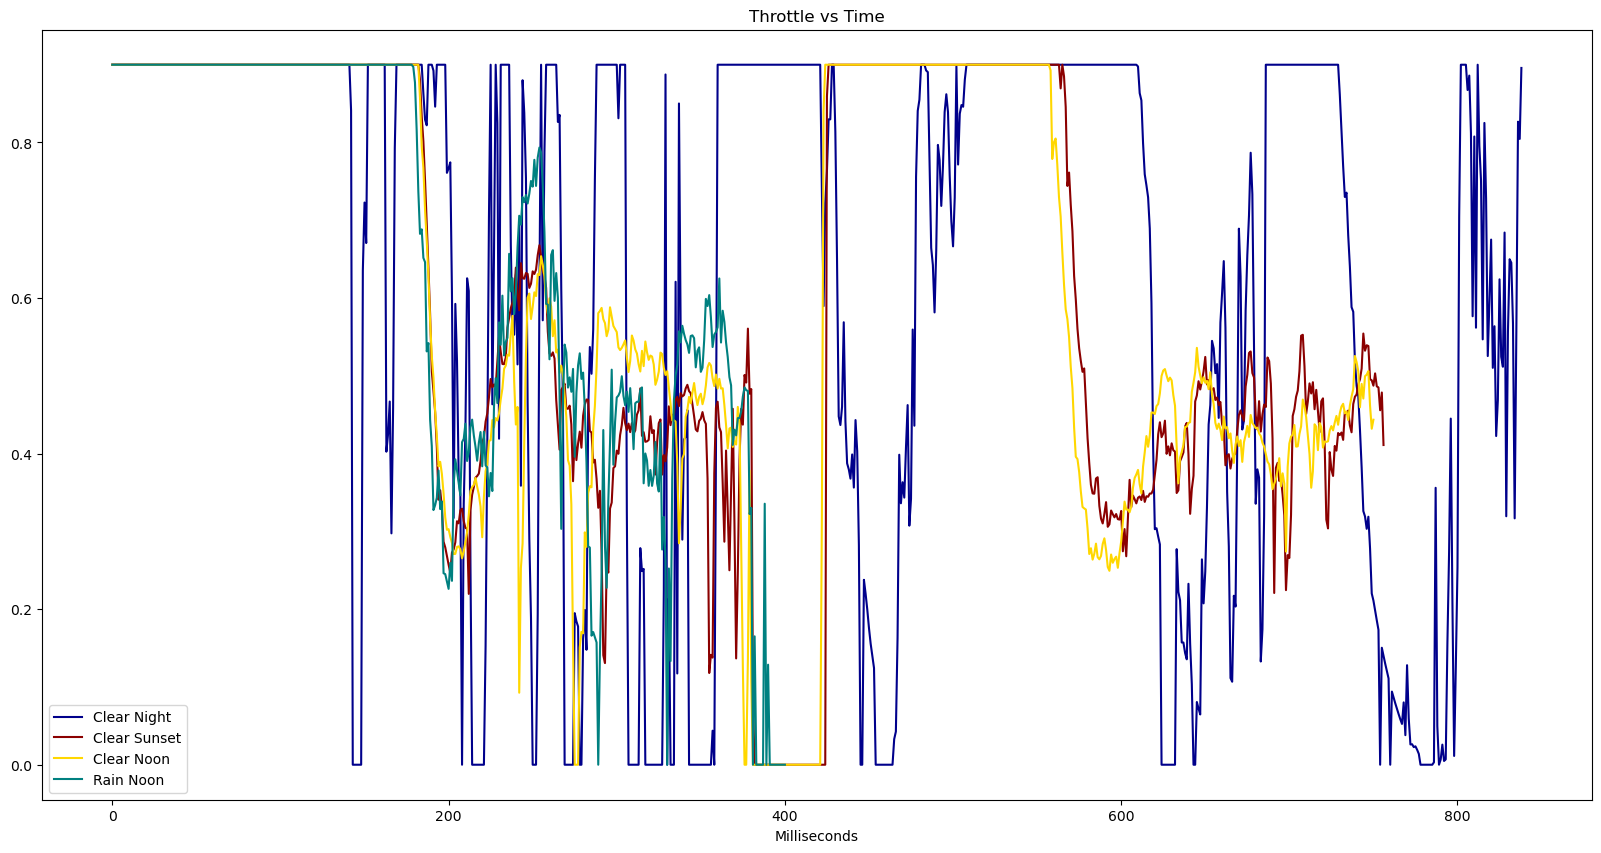

In [56]:
## Visualizing Results
time = np.arange(0,1000,1)

## Throttle vs Time
plt.figure(figsize=(20,10))

plt.title("Throttle vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['throttle'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['throttle'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['throttle'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['throttle'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

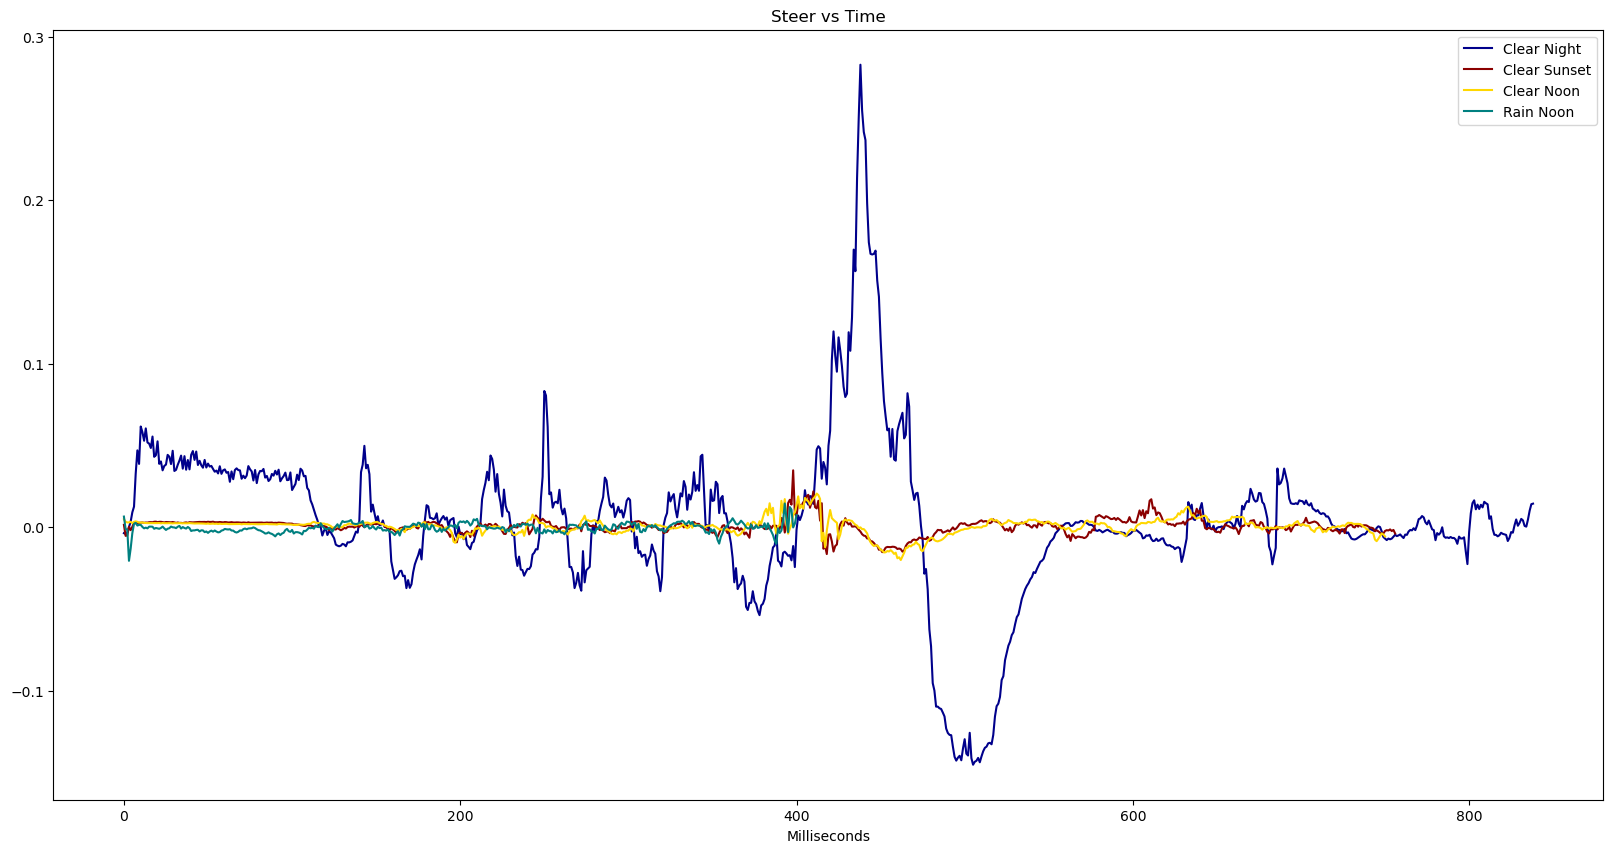

In [57]:
## Steer vs Time
plt.figure(figsize=(20,10))

plt.title("Steer vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['steer'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['steer'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['steer'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['steer'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

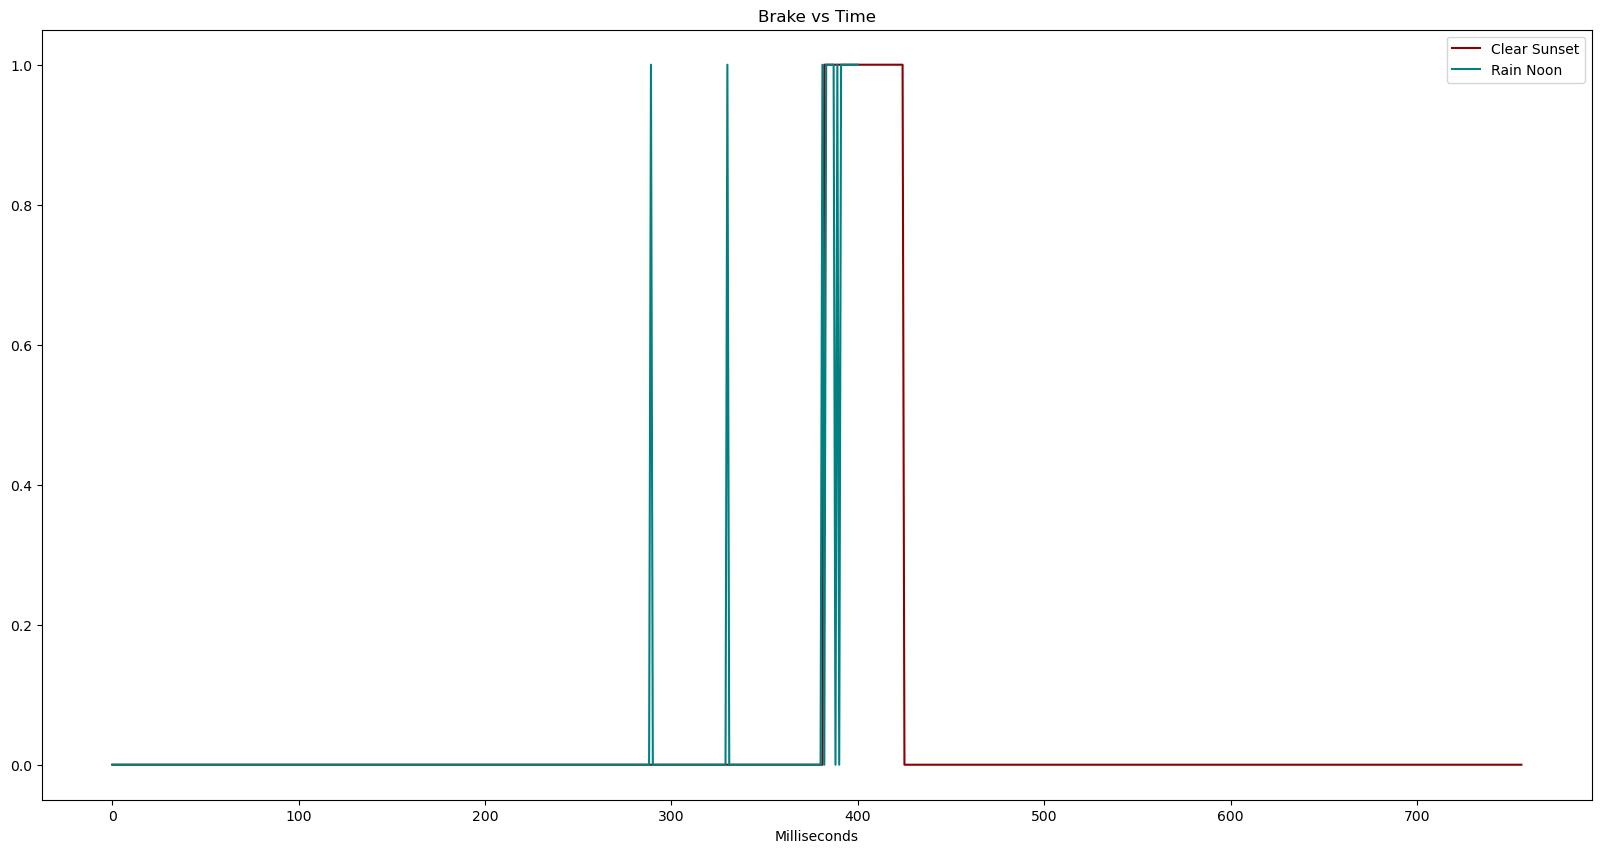

In [58]:
## Brake vs Time
plt.figure(figsize=(20,10))

plt.title("Brake vs Time")
plt.xlabel("Milliseconds")

# plt.plot(time[:clear_night.shape[0]],clear_night['brake'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['brake'],color='darkred',label="Clear Sunset")
# plt.plot(time[:clear_noon.shape[0]],clear_noon['brake'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['brake'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

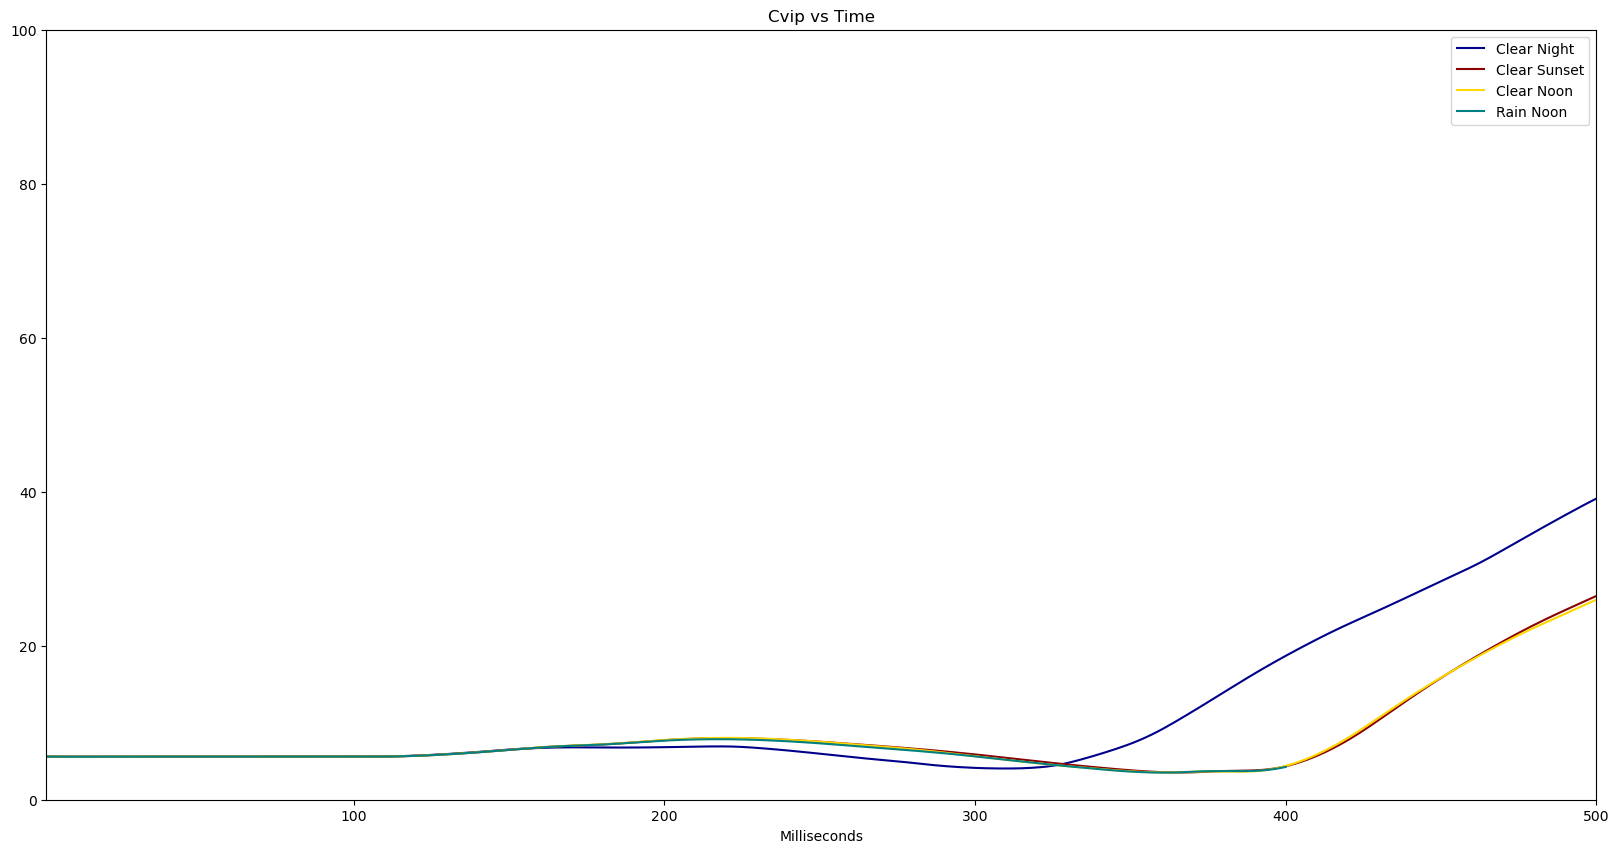

In [59]:
## Cvip vs Time
plt.figure(figsize=(20,10))

plt.title("Cvip vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['cvip'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['cvip'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['cvip'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['cvip'],color='teal',label="Rain Noon")

plt.ylim(0,100)
plt.xlim(1,500)

plt.legend()
plt.show()

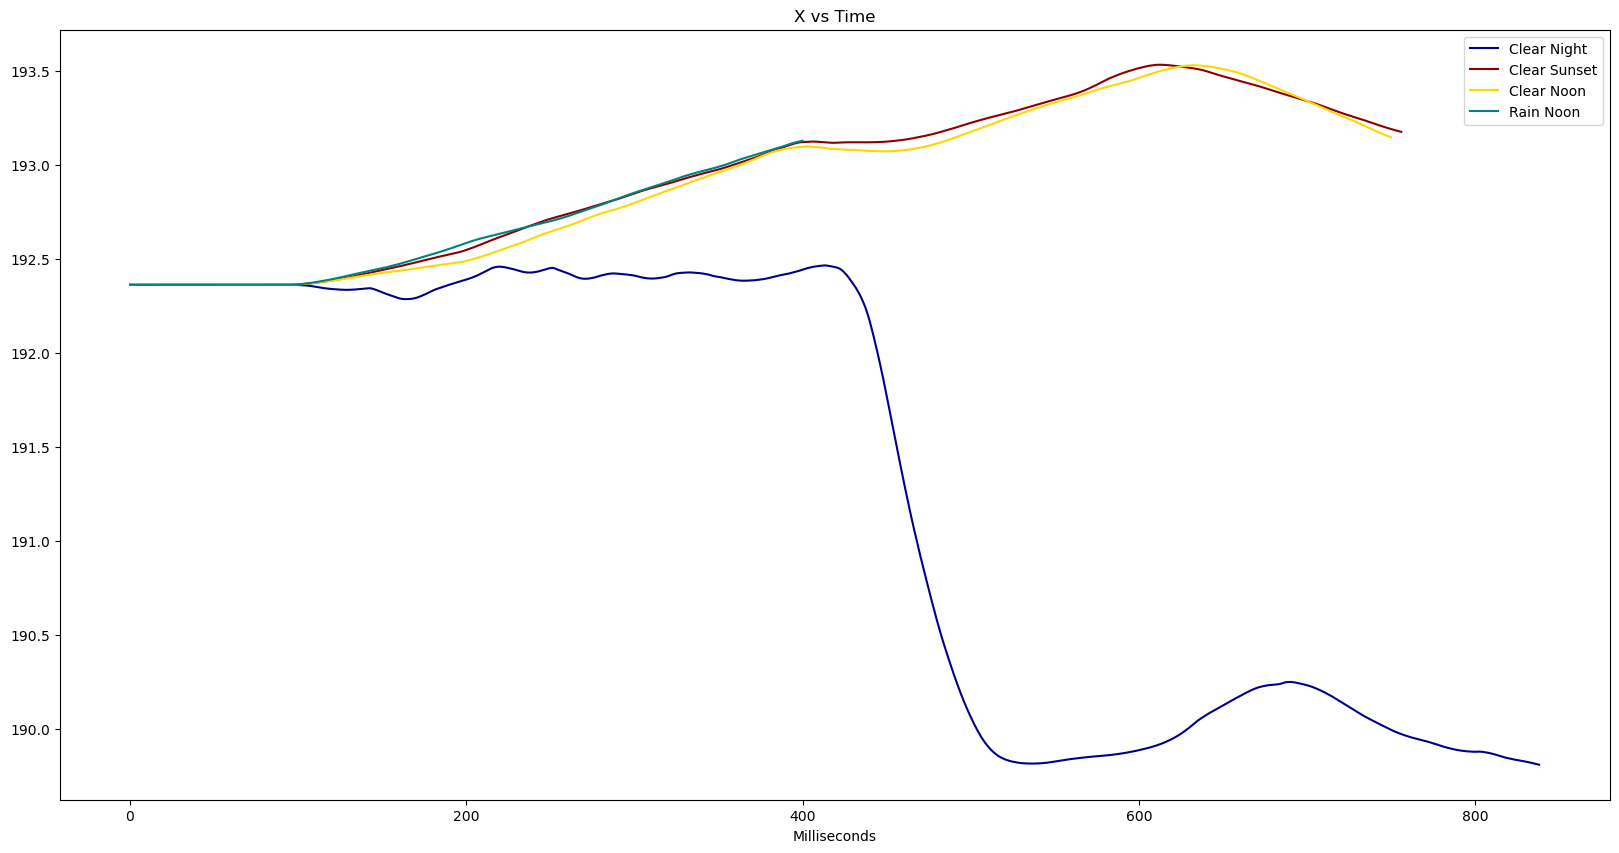

In [60]:
## X vs Time
plt.figure(figsize=(20,10))

plt.title("X vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['x'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['x'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['x'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['x'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

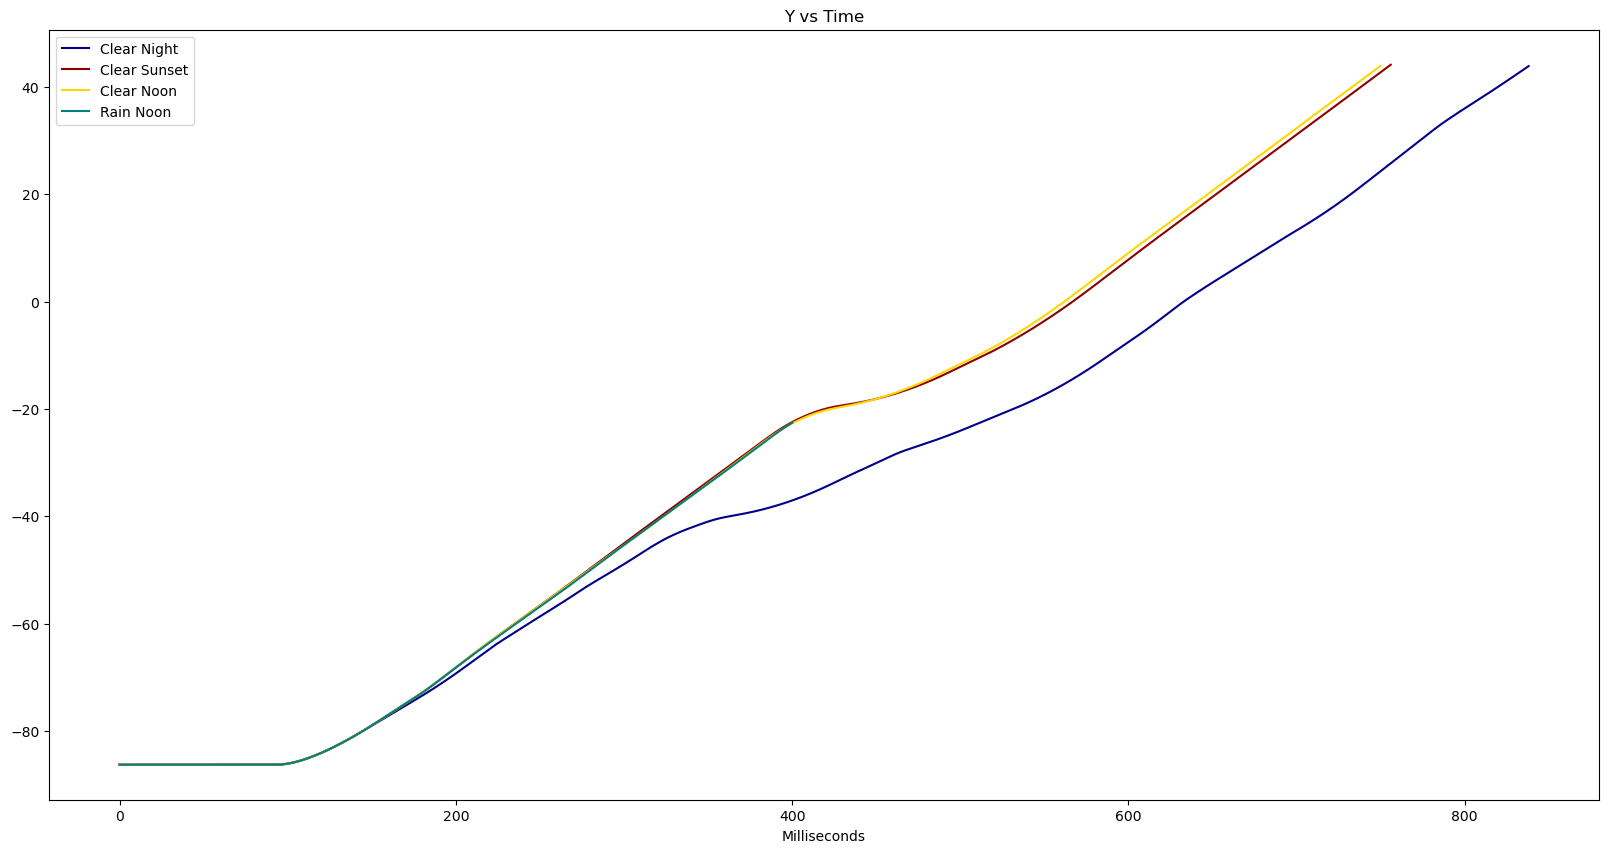

In [61]:
## Y vs Time
plt.figure(figsize=(20,10))

plt.title("Y vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['y'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['y'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['y'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['y'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

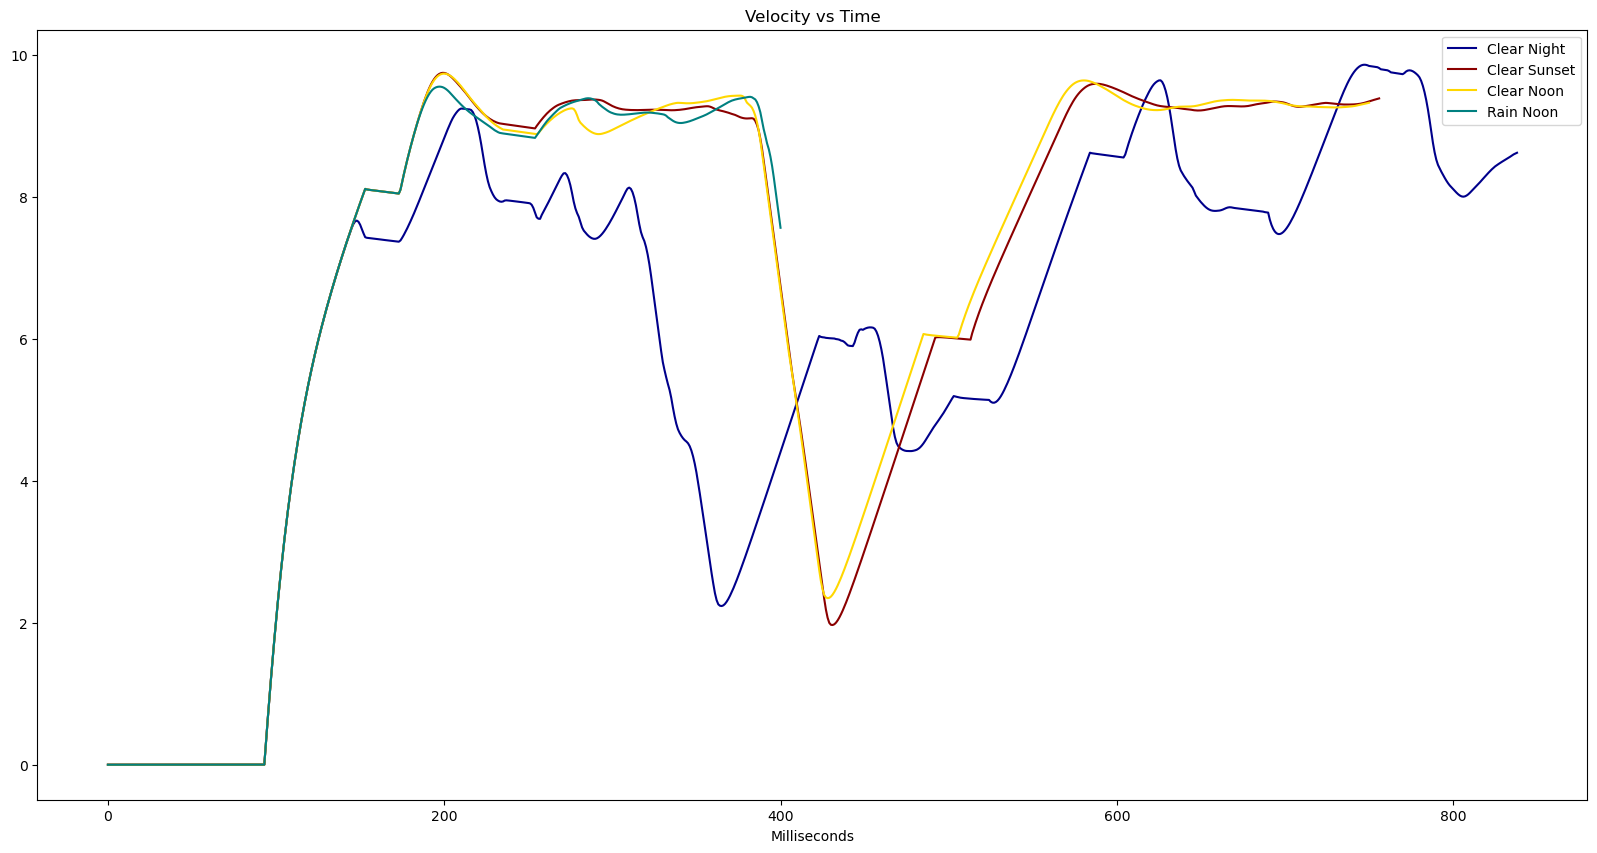

In [62]:
## Velocity vs Time
plt.figure(figsize=(20,10))

plt.title("Velocity vs Time")
plt.xlabel("Milliseconds")

plt.plot(time[:clear_night.shape[0]],clear_night['v'],color='darkblue',label="Clear Night")
plt.plot(time[:clear_sunset.shape[0]],clear_sunset['v'],color='darkred',label="Clear Sunset")
plt.plot(time[:clear_noon.shape[0]],clear_noon['v'],color='gold',label="Clear Noon")
plt.plot(time[:rain_noon.shape[0]],rain_noon['v'],color='teal',label="Rain Noon")

plt.legend()
plt.show()

#### Experience / Intuition: How should crashing affect car motion?
- throttle: would expect to be negative, as velocity slows
- velocity: would expect to drop
- steer: direction may or may not change
- brake: may or may not change dependning on the abruptness of the crash. Would expect a slight change in general
- x, y, cvip: would be hard to compare against non accident data


Based on the throttle, steering, and x-change of the car in the clear night scenario, I would predict a crash in that condition.

# Task 2

1. Our data includes 6 simulations in distinct weather conditions. There was only one recorded crash, which took place in the rain-noon simulation. Therefore, without knowing the weather conditions, the probability of a crash in any given condition would be $1/6$

2. The crash occured in the rain-noon weather condition, which does not match my prediction from above. It took place slightly after 400 milliseconds into the simulation. The graphs give no obvious insight into why the crash occured exactly at that time. Some minor observations from the plots include the following: 
    - Insufficient breaking: the graph reveals that the vehicle did not break consistently during the time right before the crash. Additinally, it began breaking later than in the other cases. This lines up with what we viewed in the simulation through Carla.
    - Throttle: From the throttle vs time graph, we can see the vehicle accelerating immediately preceeding the crash.
    - Cvip: The EV remained consistenyl close to the risky NPC actor throughout the duration of the simulation.

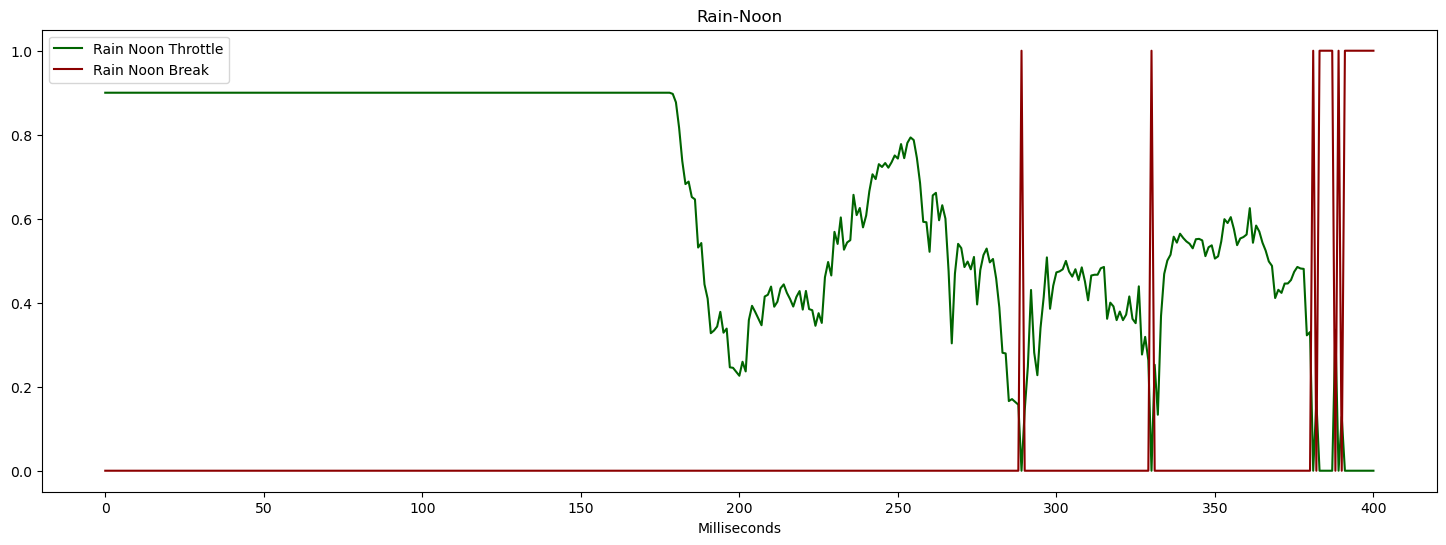

In [63]:
## Rain breaking

plt.figure(figsize=(18,6))

plt.title("Rain-Noon")
plt.xlabel("Milliseconds")

plt.plot(time[:rain_noon.shape[0]],rain_noon['throttle'],color='darkgreen',label="Rain Noon Throttle")
plt.plot(time[:rain_noon.shape[0]],rain_noon['brake'],color='darkred',label="Rain Noon Break")

plt.legend()
plt.show()

3. In the clear night weather condition, the EV displayed atypical behavior. This includes:
    - consistenly lower speeds
    - lane change
    - jittery steering, even before lane change
    - throttle usage very jumpy, typically either fully on or fully off
    - maintains maximum distance from NPC actor

We believe many of these observations are due to EV nighttime programmed behavior probably being more risk-adverse and aware of surroundings.

In [69]:
normal = pd.concat([clear_noon[['brake','steer','v','y','x','cvip']],clear_sunset[['brake','steer','v','y','x','cvip']]]).reset_index(drop=True)
abnormal = pd.concat([clear_night[['brake','steer','v','y','x','cvip']],rain_noon[['brake','steer','v','y','x','cvip']]]).reset_index(drop=True)

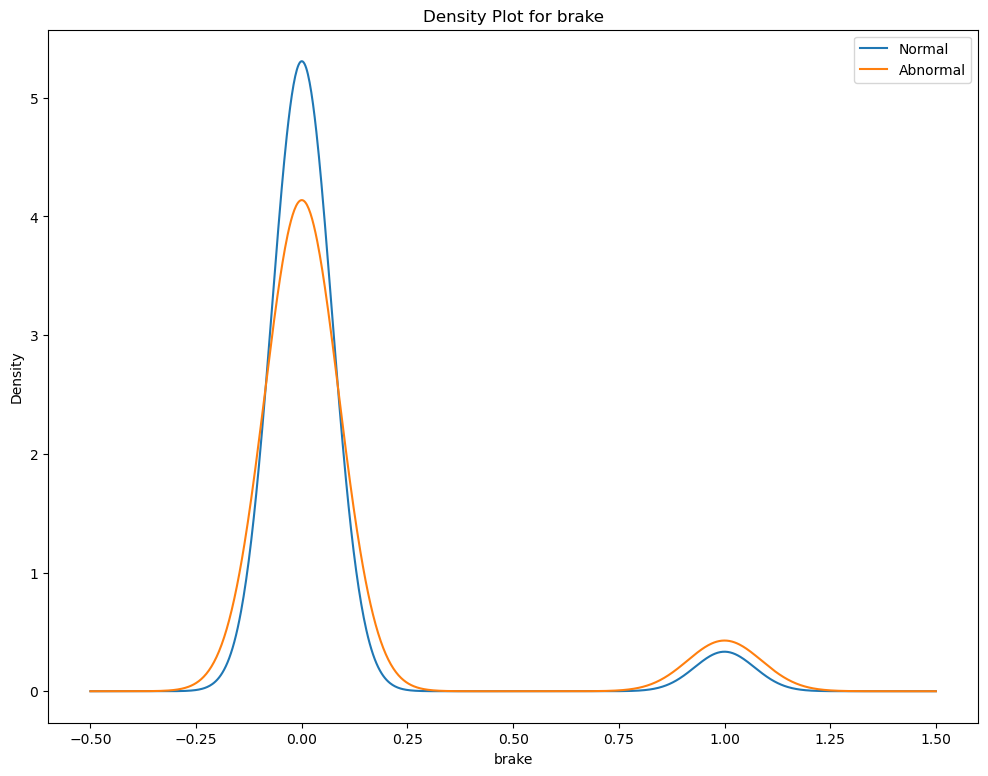

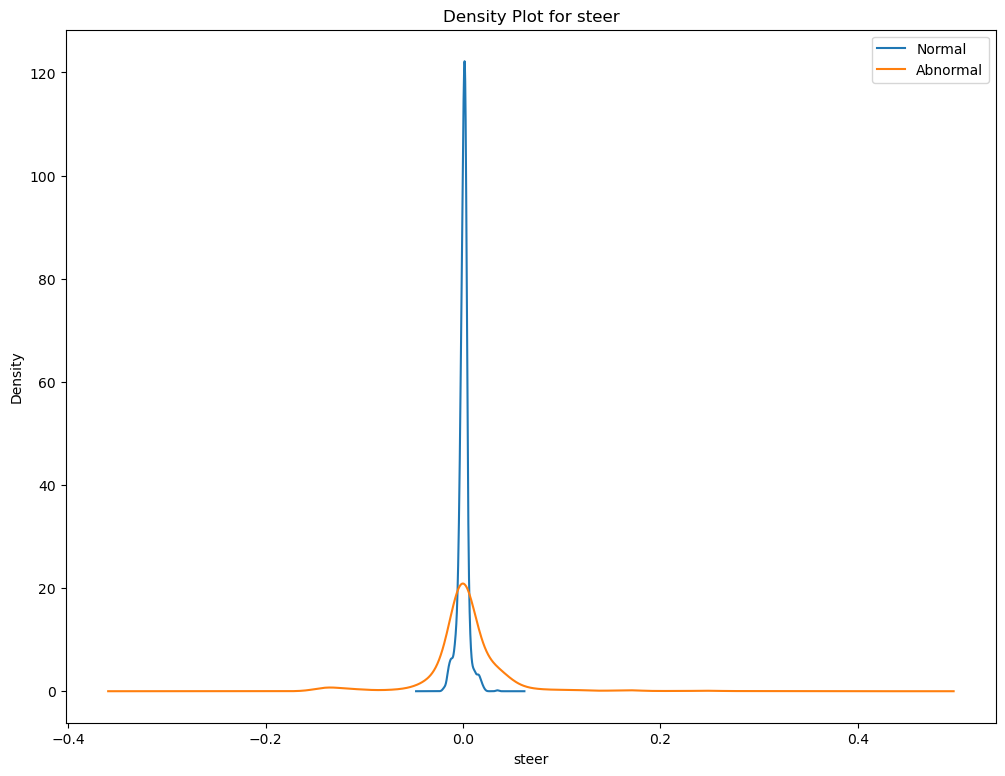

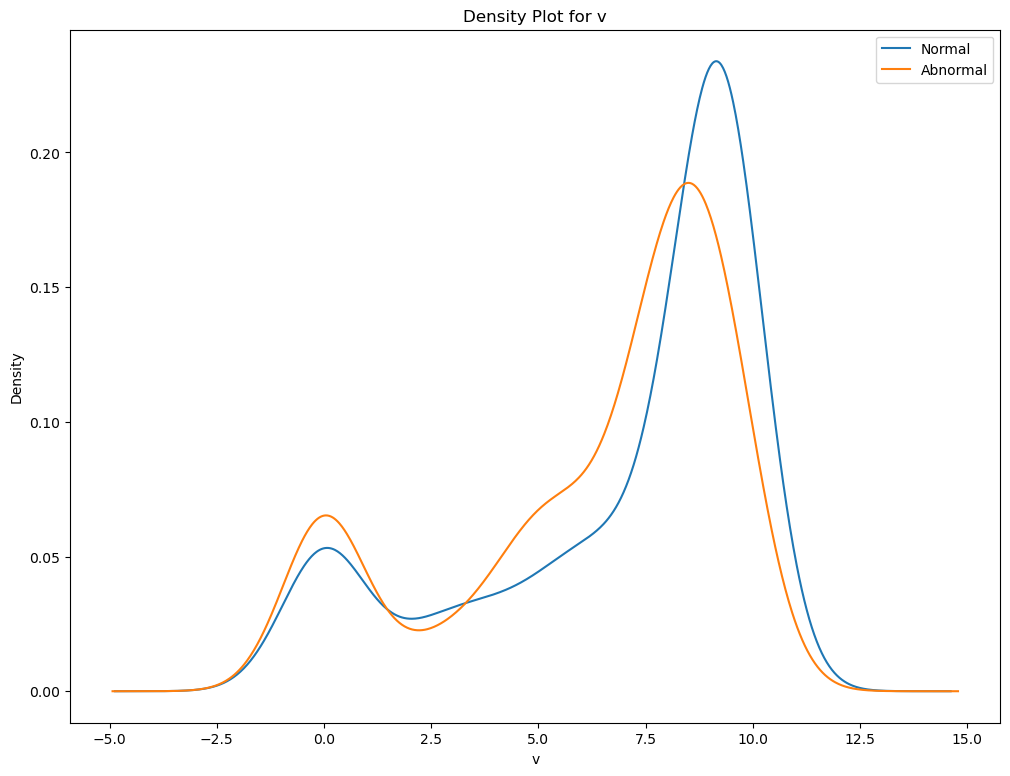

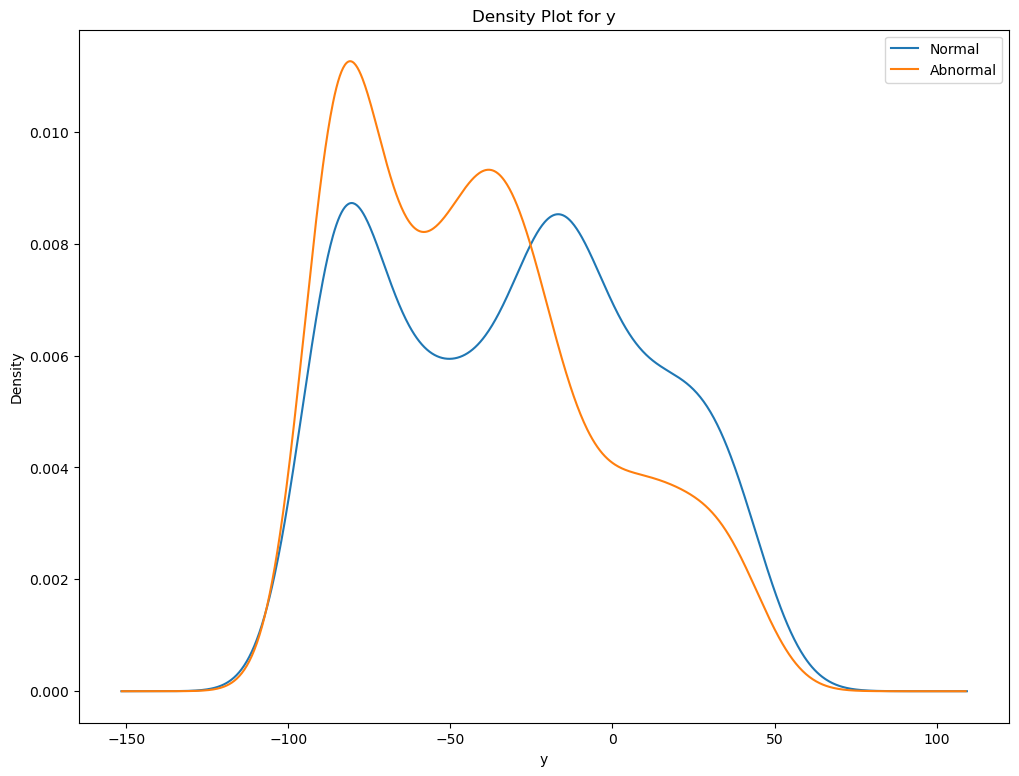

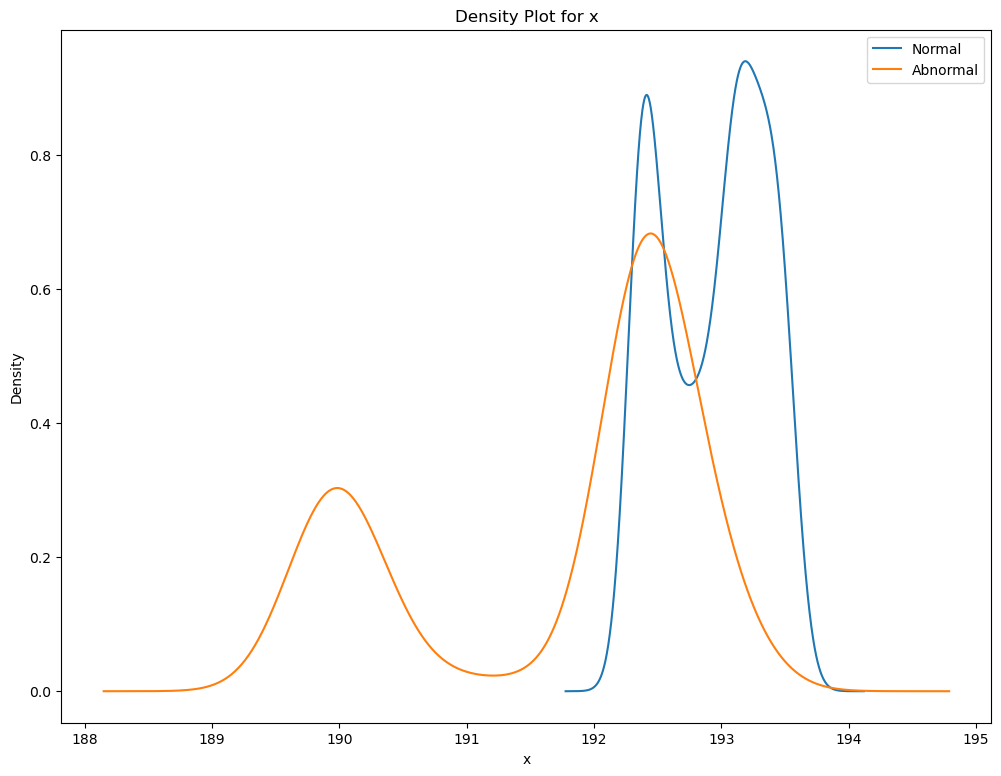

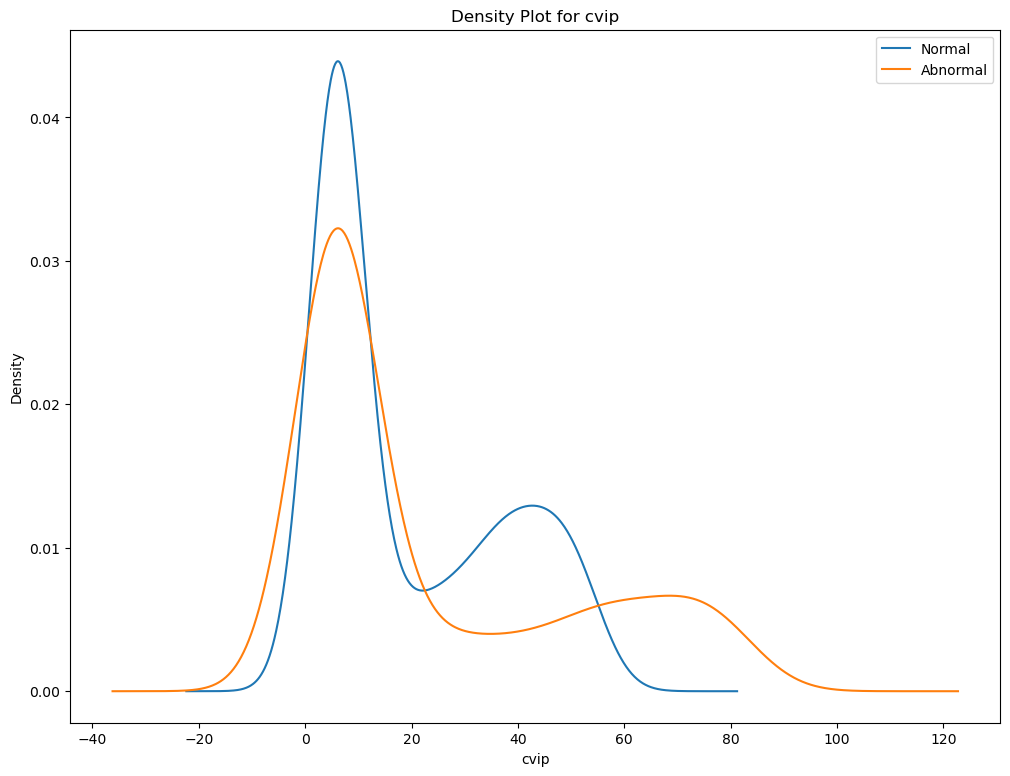

In [80]:
normal['runtype'] = 0
abnormal['runtype'] = 1

features = ['brake','steer','v','y','x','cvip']
for f in features:
    plt.figure(figsize=(12,9))
    
    normal[f].plot.kde(label='Normal', bw_method=0.3)
    abnormal[f].plot.kde(label='Abnormal', bw_method=0.3)
    
    plt.title(f'Density Plot for {f}')
    plt.xlabel(f'{f}')
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

### Question 4

#### a
Comparing the steering between the normal nd abnormal runs, there were two primary differences.
1. The normal runs had a higher density close to zero. This is because these EVs stayed in the same lane, as opposed to in one of the abnormal cases (clear_night) where the EV changed lanes. 
2. Greater variance in steering for abnormal runs, due to the same reason as above.

#### Steering

$H_0$: There is no significant difference between the steering variable population means between the normal and abnormal runs.  
$H_1$: There is a significant difference in said population means.

$\alpha$=0.05


In [85]:
## Two-sided T-test (using sample variances) with Scipy

t, p = scipy.stats.ttest_ind(normal['steer'],abnormal['steer'])

print(f'T-statistic: {t}')
print(f'P-value: {p}','\n')

if p<0.05:
    print("There exists significant evidence to reject the Null Hypothesis.")
else:
    print("Failed to reject Null Hypothesis.")

T-statistic: -1.6672087565972211
P-value: 0.09558693315479305 

Failed to reject Null Hypothesis.


It did not contradict our observation because both the normal and abnormal distributions seemed to have means centered very close to zero.

### 5